<a href="https://colab.research.google.com/github/BlueGrisGris/am216/blob/collab/AM216_Exoplanets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AstroNet: A Neural Network for Identifying Exoplanets in Light Curves


## Background

Any person who has seen a solar eclipse knows that it is one of the coolest astronomical events you'll ever experience. It happens when the moon passes directly in front of the sun, blocking its light.

![Solar Eclipse](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Total_Solar_Eclipse_8-21-17.jpg/450px-Total_Solar_Eclipse_8-21-17.jpg)

As it turns out, a solar eclipse is similar to how the transit method finds exoplanets in other solar systems! When a planet passes directly between an observer and the star it orbits, it blocks some of that star's light. For a brief period of time, that star actually gets dimmer. It's a tiny change, but it's enough to clue astronomers into the presence of an exoplanet around a distant star.

![Transit Animation](https://storage.googleapis.com/gweb-uniblog-publish-prod/original_images/NASA_PlanetsPart1_v03_1000px.gif)

The graph you see above is what astronomers call a 'light curve'. It's a chart of the level of light being observed from the star. When a planet passes in front of the star and blocks some of its light, the light curve indicates this drop in brightness.

In this project, you will examine the question of identifying exoplanets in astrophysical light curves. You will make use of nueral networks to try and differentiate exoplanets from binary stars, which are subtely different in their light curves.  For complete background,
see [this paper](http://doi.org/10.3847/1538-3881/aa9e09) in
*The Astronomical Journal*.

For shorter summaries, see:

* ["Earth to Exoplanet"](https://www.blog.google/topics/machine-learning/hunting-planets-machine-learning/) on the Google blog
* [This blog post](https://www.cfa.harvard.edu/~avanderb/page1.html#kepler90) by Andrew Vanderburg
* [This great article](https://milesobrien.com/artificial-intelligence-gains-intuition-hunting-exoplanets/) by Fedor Kossakovski
* [NASA's press release](https://www.nasa.gov/press-release/artificial-intelligence-nasa-data-used-to-discover-eighth-planet-circling-distant-star) article




## The Data

### Kepler Data and TCEs

A *light curve* is a plot of the brightness of a star over time. We will be
focusing on light curves produced by the Kepler space telescope, which monitored
the brightness of 200,000 stars in our milky way galaxy for 4 years. One of the raw light curves produced by Kepler is shown below.

![Kepler-934](https://raw.githubusercontent.com/google-research/exoplanet-ml/master/exoplanet-ml/astronet/docs/kepler-943.png)

To train a model to identify planets in Kepler light curves, you will use a subset of the raw data, which we have cleaned and shortened for your convenience.  What makes this mini-project particularly challenging is the use of two different input data.  One is a long-range dataset, the other is short-range.  By using both these datasets as inputs, you will be able to train an incredibly capable neural network.

We have arranged the data into JSON files which will be imported into dictionaries.  These dictionaries contain the following:
* `av_training_set`: Autovetter training set label. (THIS IS THE SAME AS THE FOLDER WHICH CONTAINS THE JSON FILE)
* `global_view`: Vector of length 2001: a "global view" of the light curves.
* `local_view`: Vector of length 201: a "local view" of the light curves.

In addition, each JSON file will contain:

* `kepid`: Kepler ID of the target star.

The dictionaries do contain even further data, but this is not required for use within your models (though you are free to use it if you want).

The data is separated into 3 categories:

1. PC (Exo-planet Candidate)
2. AFP ([Astrophysical False Positive](https://www.nature.com/articles/492048a))
3. NTP (Non-Transiting Phenomenon)

Let's take a moment to examine some data from each of the three categories:

### PC (Exo-planet Candidate)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import tensorflow as tf
import json

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
SAVE_DIR = "/Exoplanets" #CHANGE TO YOUR DIRECTORY
# del exo_dictionary
with open('Exoplanets/PC/0.json', 'r') as fp:
    exo_dictionary = json.load(fp)
    
exo_dictionary['kepid']

6362874

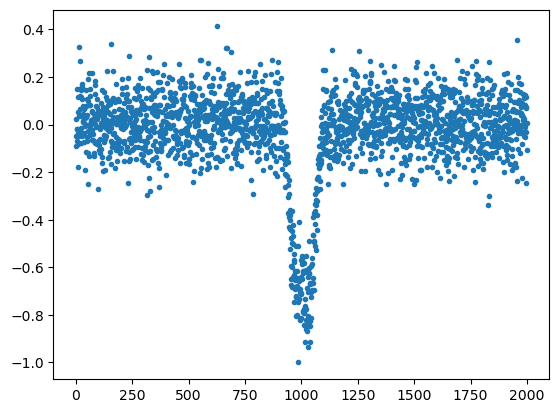

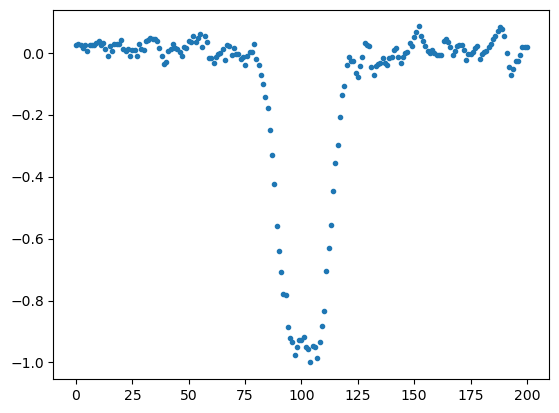

In [4]:
plt.plot(exo_dictionary['global_view'],'.')
plt.show()

plt.plot(exo_dictionary['local_view'],'.')
plt.show()

### AFP (Astrophysical False Positives)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import tensorflow as tf
import json

In [6]:
SAVE_DIR = "Exoplanets/" #CHANGE TO YOUR DIRECTORY
del exo_dictionary

with open('Exoplanets/AFP/0.json', 'r') as fp:
    exo_dictionary = json.load(fp)
    
exo_dictionary['kepid']

7906739

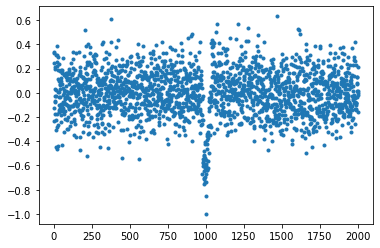

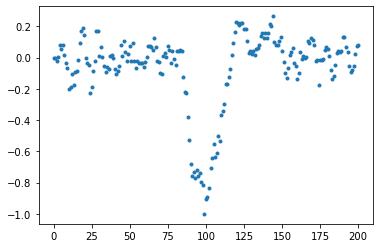

In [ ]:
plt.plot(exo_dictionary['global_view'],'.')
plt.show()

plt.plot(exo_dictionary['local_view'],'.')
plt.show()

As we can see, this is extremely similar looking to the pattern provided by an exoplanet.  

### NTP (Non-Transiting Phenomenon)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os.path
# import tensorflow as tf
# import json

In [7]:
SAVE_DIR = "Exoplanets/" #CHANGE TO YOUR DIRECTORY
del exo_dictionary

with open('Exoplanets/NTP/0.json', 'r') as fp:
    exo_dictionary = json.load(fp)
    
exo_dictionary['kepid']

2714955

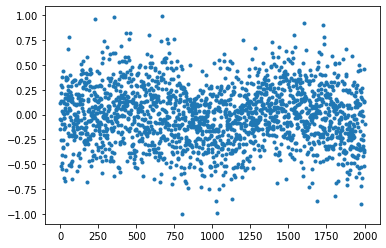

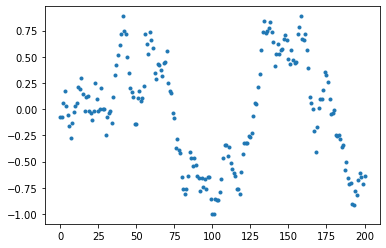

In [ ]:
plt.plot(exo_dictionary['global_view'],'.')
plt.show()

plt.plot(exo_dictionary['local_view'],'.')
plt.show()

Here we see a more oscillatory pattern, though it is still nontrivial to determine if this is an exoplanet.

## Your Task

First you have to import the JSON files into python, and prepare them for use in a neural network.  This means you will have to create training and testing datasets with appropriate labels.

Once the data is prepared, you should follow along with [this paper](http://doi.org/10.3847/1538-3881/aa9e09), designing three network architectures:

1. A fully connected neural network which has two inputs (the global and local data)
2. A fully connected convolutional neural network which has two inputs (the global and the local data)
3. A network of your choosing, using whatever inputs you want (feel free to use the extra data we've provided in the JSON files)

Finally, we ask that you re-create Figure 6 and Figure 9 as well.

These tasks may seem difficult, but there are some resources to help you.  The paper you are following has a documented [github page](https://github.com/google-research/exoplanet-ml/tree/master/exoplanet-ml/astronet) which hosts all the code they used for this project.  This code is written is a far more sophisticated manner than you may be used to, but don't be intimidated.  Everything is heavily commented and explained.

In the end, do your best and have fun!  These projects are meant to have an element of freedom and exploration, so its okay if you want to deviate from the above instructions a bit.

In [8]:
from sklearn.model_selection import train_test_split
from  sklearn.manifold import TSNE as TSNE
from sklearn.svm import SVC as SVC
from sklearn.decomposition import PCA as PCA

First, let's import the data into numpy arrays.

In [11]:
import os

In [ ]:
directory_PC = 'Exoplanets/PC'
directory_AFP = 'Exoplanets/AFP'
directory_NTP = 'Exoplanets/NTP'

In [ ]:
local_PC = []
global_PC = []

local_AFP = []
global_AFP = []

local_NTP = []
global_NTP = []

for filename in os.listdir(directory_PC):
    with open(directory_PC+'/'+filename, 'r') as fp:
        exo_dictionary = json.load(fp)
    
        local_PC.append(exo_dictionary['local_view'])
        global_PC.append(exo_dictionary['global_view'])
        
for filename in os.listdir(directory_AFP):
    with open(directory_AFP+'/'+filename, 'r') as fp:
        exo_dictionary = json.load(fp)
    
        local_AFP.append(exo_dictionary['local_view'])
        global_AFP.append(exo_dictionary['global_view'])
        
for filename in os.listdir(directory_NTP):
    with open(directory_NTP+'/'+filename, 'r') as fp:
        exo_dictionary = json.load(fp)
    
        local_NTP.append(exo_dictionary['local_view'])
        global_NTP.append(exo_dictionary['global_view'])

In [ ]:
local_PC = np.array(local_PC)
global_PC = np.array(global_PC)
local_AFP = np.array(local_AFP)
global_AFP = np.array(global_AFP)
local_NTP = np.array(local_NTP)
global_NTP = np.array(global_NTP)

In [ ]:
local_data = np.concatenate((local_PC,local_AFP,local_NTP),axis=0)

In [ ]:
global_data = np.concatenate((global_PC,global_AFP,global_NTP),axis=0)

In [ ]:
labels = np.concatenate((np.ones(len(local_PC)),np.zeros(len(local_AFP)),np.zeros(len(local_NTP))),axis=0)

In [9]:
np.savetxt('local.csv',local_data)

NameError: name 'local_data' is not defined

In [10]:
np.savetxt('global.csv',global_data)

NameError: name 'global_data' is not defined

In [ ]:
np.savetxt('labels.csv',labels)

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import tensorflow as tf
import json

In [13]:
from sklearn.model_selection import train_test_split
from  sklearn.manifold import TSNE as TSNE
from sklearn.svm import SVC as SVC
from sklearn.decomposition import PCA as PCA

In [15]:
import os
# os.chdir("/content/drive/MyDrive/AM216/Mini Project")
os.chdir(".")

local_data = np.loadtxt('local.csv')
global_data = np.loadtxt('global.csv')
labels = np.loadtxt('labels.csv')

local_train, local_test, y_train, y_test = train_test_split(local_data, labels, test_size=0.2, random_state=1)

global_train, global_test, y_train2, y_test2 = train_test_split(global_data, labels, test_size=0.2, random_state=1)

# Models

## Feedforward network

In [ ]:
local_len = local_train.shape[1]
global_len = global_train.shape[1]

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 201)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2001)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 201)          40602       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2001)         4006002     ['input_2[0][0]']                
                                                                                              

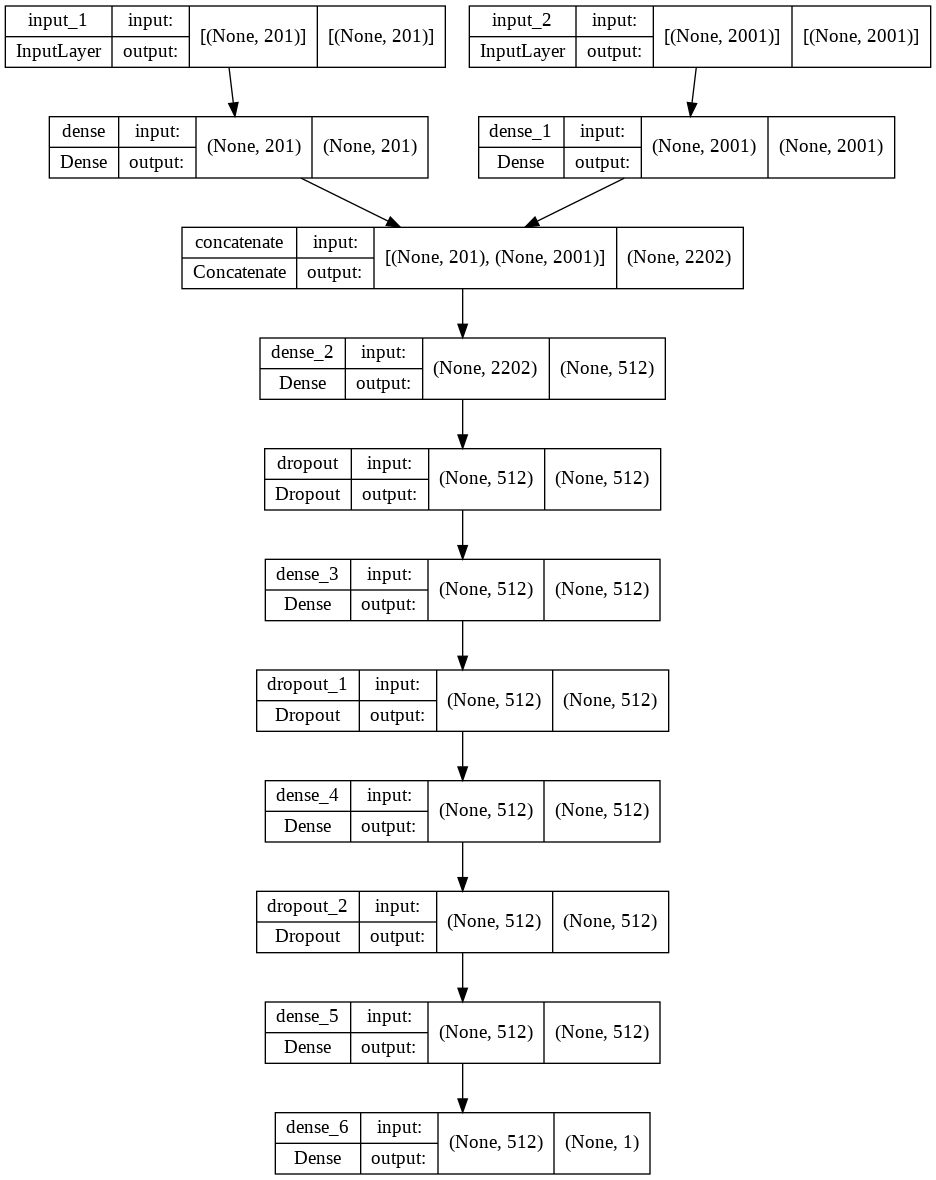

In [ ]:
local_input = tf.keras.Input(shape=(local_len,))
global_input = tf.keras.Input(shape=(global_len,))
x_local = tf.keras.layers.Dense(local_len, activation=tf.nn.relu)(local_input)
x_global = tf.keras.layers.Dense(global_len, activation=tf.nn.relu)(global_input)

x = tf.keras.layers.concatenate([x_local,x_global])
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
y = tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)(x)

model = tf.keras.Model(inputs=(local_input,global_input), outputs=y)
model.compile(optimizer="Adam", loss="mse",metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 10
history = model.fit(x=(local_train,global_train),y=y_train,epochs=epochs)

Epoch 1/10
394/394 [==============================] - 5s 8ms/step - loss: 0.0727 - accuracy: 0.8984
Epoch 2/10
394/394 [==============================] - 3s 9ms/step - loss: 0.0381 - accuracy: 0.9538
Epoch 3/10
394/394 [==============================] - 3s 8ms/step - loss: 0.0261 - accuracy: 0.9681
Epoch 4/10
394/394 [==============================] - 3s 8ms/step - loss: 0.0208 - accuracy: 0.9753
Epoch 5/10
394/394 [==============================] - 3s 8ms/step - loss: 0.0180 - accuracy: 0.9787
Epoch 6/10
394/394 [==============================] - 3s 8ms/step - loss: 0.0166 - accuracy: 0.9801
Epoch 7/10
394/394 [==============================] - 3s 8ms/step - loss: 0.0174 - accuracy: 0.9805
Epoch 8/10
394/394 [==============================] - 3s 8ms/step - loss: 0.0146 - accuracy: 0.9832
Epoch 9/10
394/394 [==============================] - 3s 8ms/step - loss: 0.0138 - accuracy: 0.9840
Epoch 10/10
394/394 [==============================] - 3s 9ms/step - loss: 0.0141 - accuracy: 0.9843

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/AM216/Mini Project/dense_model')

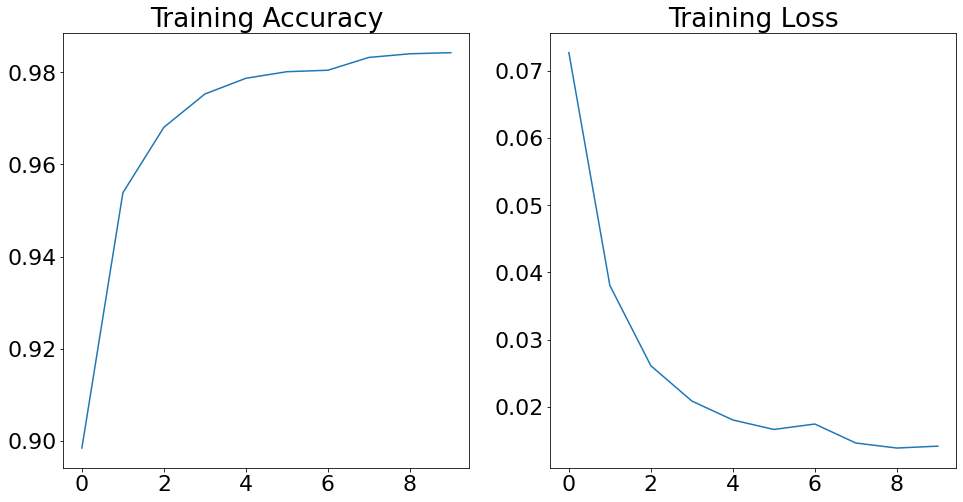

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(epochs)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.show()

##Convolutional network


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 2001, 1)]    0           []                               
                                                                                                  
 conv1d_14 (Conv1D)             (None, 1997, 16)     96          ['input_6[0][0]']                
                                                                                                  
 conv1d_15 (Conv1D)             (None, 1993, 16)     1296        ['conv1d_14[0][0]']              
                                                                                                  
 max_pooling1d_7 (MaxPooling1D)  (None, 995, 16)     0           ['conv1d_15[0][0]']              
                                                                                            

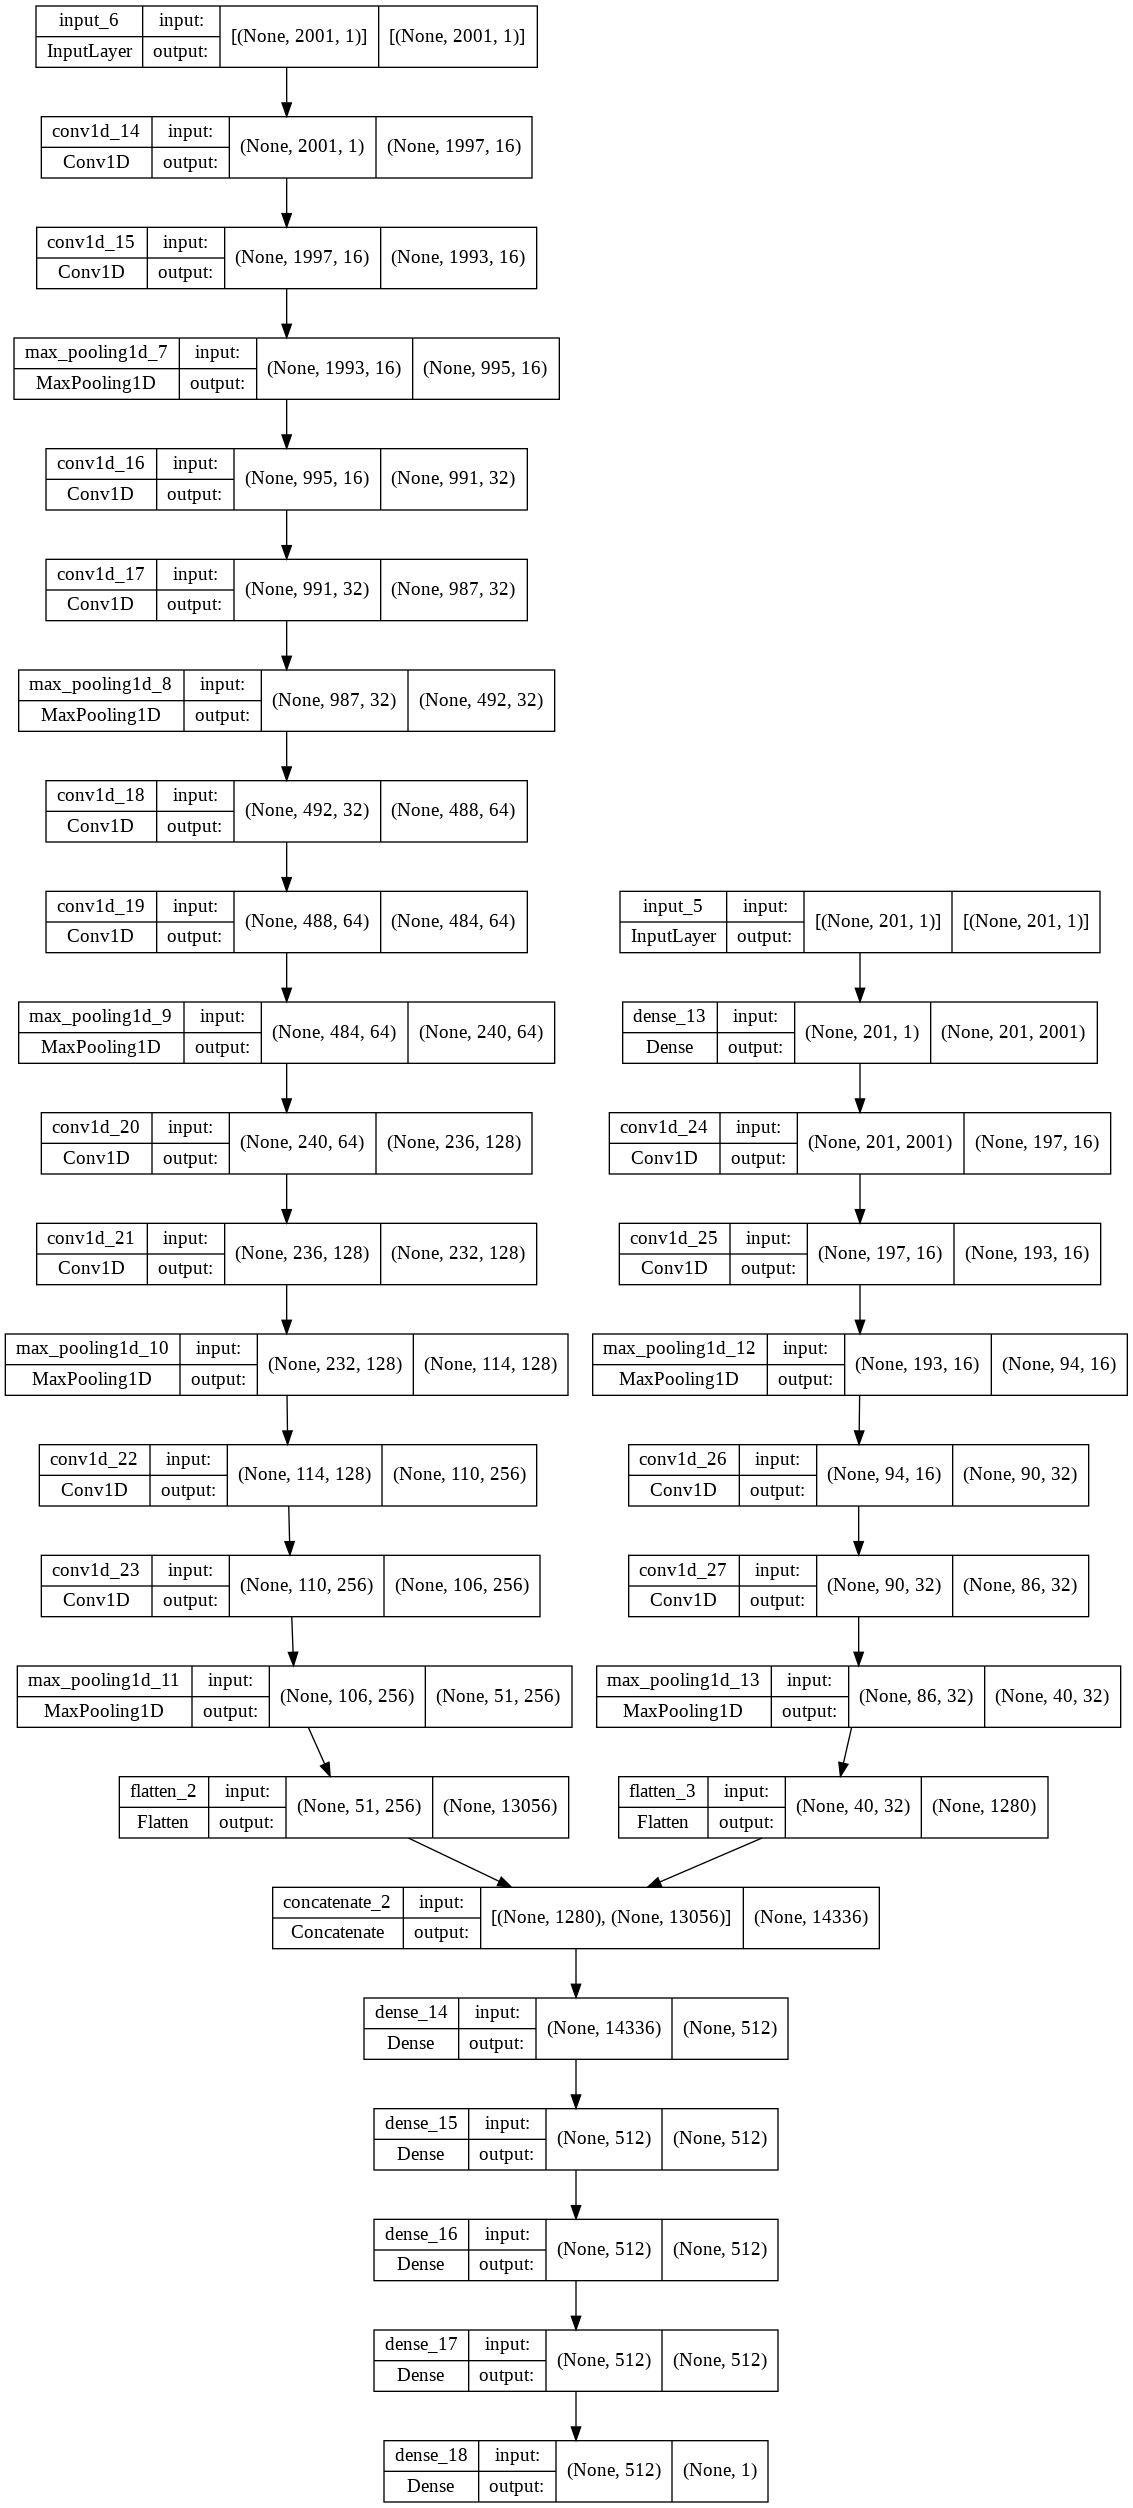

In [ ]:
local_input_conv = tf.keras.Input(shape=(local_len,1))
global_input_conv = tf.keras.Input(shape=(global_len,1))
x_global_conv = tf.keras.layers.Conv1D(filters=16,kernel_size=5)(global_input_conv)
x_global_conv = tf.keras.layers.Conv1D(filters=16,kernel_size=5)(x_global_conv)
x_global_conv = tf.keras.layers.MaxPooling1D(pool_size=5,strides=2)(x_global_conv)
x_global_conv = tf.keras.layers.Conv1D(filters=32,kernel_size=5)(x_global_conv)
x_global_conv = tf.keras.layers.Conv1D(filters=32,kernel_size=5)(x_global_conv)
x_global_conv = tf.keras.layers.MaxPooling1D(pool_size=5,strides=2)(x_global_conv)
x_global_conv = tf.keras.layers.Conv1D(filters=64,kernel_size=5)(x_global_conv)
x_global_conv = tf.keras.layers.Conv1D(filters=64,kernel_size=5)(x_global_conv)
x_global_conv = tf.keras.layers.MaxPooling1D(pool_size=5,strides=2)(x_global_conv)
x_global_conv = tf.keras.layers.Conv1D(filters=128,kernel_size=5)(x_global_conv)
x_global_conv = tf.keras.layers.Conv1D(filters=128,kernel_size=5)(x_global_conv)
x_global_conv = tf.keras.layers.MaxPooling1D(pool_size=5,strides=2)(x_global_conv)
x_global_conv = tf.keras.layers.Conv1D(filters=256,kernel_size=5)(x_global_conv)
x_global_conv = tf.keras.layers.Conv1D(filters=256,kernel_size=5)(x_global_conv)
x_global_conv = tf.keras.layers.MaxPooling1D(pool_size=5,strides=2)(x_global_conv)
x_global_conv = tf.keras.layers.Flatten()(x_global_conv)

x_local_conv = tf.keras.layers.Dense(global_len, activation=tf.nn.relu)(local_input_conv)
x_local_conv = tf.keras.layers.Conv1D(filters=16,kernel_size=5)(x_local_conv)
x_local_conv = tf.keras.layers.Conv1D(filters=16,kernel_size=5)(x_local_conv)
x_local_conv = tf.keras.layers.MaxPooling1D(pool_size=7,strides=2)(x_local_conv)
x_local_conv = tf.keras.layers.Conv1D(filters=32,kernel_size=5)(x_local_conv)
x_local_conv = tf.keras.layers.Conv1D(filters=32,kernel_size=5)(x_local_conv)
x_local_conv = tf.keras.layers.MaxPooling1D(pool_size=7,strides=2)(x_local_conv)
x_local_conv = tf.keras.layers.Flatten()(x_local_conv)

x = tf.keras.layers.concatenate([x_local_conv,x_global_conv])
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
# x = tf.keras.layers.Dropout(.2)(x)
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
# x = tf.keras.layers.Dropout(.2)(x)
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
# x = tf.keras.layers.Dropout(.2)(x)
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
y = tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)(x)
model_conv = tf.keras.Model(inputs=(local_input_conv,global_input_conv), outputs=y)
model_conv.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=1e-05,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    ), loss="mse", metrics=['accuracy'])
model_conv.summary()
tf.keras.utils.plot_model(model_conv, show_shapes=True, show_layer_names=True)

In [ ]:
model_conv.fit(x = (np.reshape(local_train,np.r_[np.shape(local_train),1]),
                    np.reshape(global_train,np.r_[np.shape(global_train),1])),y = y_train,epochs=50,batch_size=50)

Epoch 1/50
252/252 [==============================] - 26s 86ms/step - loss: 0.1395 - accuracy: 0.8016
Epoch 2/50
252/252 [==============================] - 21s 83ms/step - loss: 0.0681 - accuracy: 0.9090
Epoch 3/50
252/252 [==============================] - 21s 84ms/step - loss: 0.0601 - accuracy: 0.9195
Epoch 4/50
252/252 [==============================] - 21s 84ms/step - loss: 0.0542 - accuracy: 0.9298
Epoch 5/50
252/252 [==============================] - 21s 84ms/step - loss: 0.0502 - accuracy: 0.9323
Epoch 6/50
252/252 [==============================] - 21s 84ms/step - loss: 0.0479 - accuracy: 0.9362
Epoch 7/50
252/252 [==============================] - 21s 84ms/step - loss: 0.0454 - accuracy: 0.9405
Epoch 8/50
252/252 [==============================] - 21s 84ms/step - loss: 0.0442 - accuracy: 0.9428
Epoch 9/50
252/252 [==============================] - 21s 84ms/step - loss: 0.0436 - accuracy: 0.9430
Epoch 10/50
252/252 [==============================] - 22s 89ms/step - loss: 0.043

In [ ]:
tf.keras.models.save_model(model_conv,'/content/drive/MyDrive/AM216/Mini Project/conv_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AM216/Mini Project/conv_model/assets


In [ ]:
model_conv.evaluate(x = (np.reshape(local_test,np.r_[np.shape(local_test),1]),
                         np.reshape(global_test,np.r_[np.shape(global_test),1])),y = y_test,verbose=0)

[0.04381154477596283, 0.9421855211257935]

## LSTM Network

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 201, 1)]     0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 2001, 1)]    0           []                               
                                                                                                  
 lstm_4 (LSTM)                  (None, 512)          1052672     ['input_5[0][0]']                
                                                                                                  
 lstm_5 (LSTM)                  (None, 512)          1052672     ['input_6[0][0]']                
                                                                                            

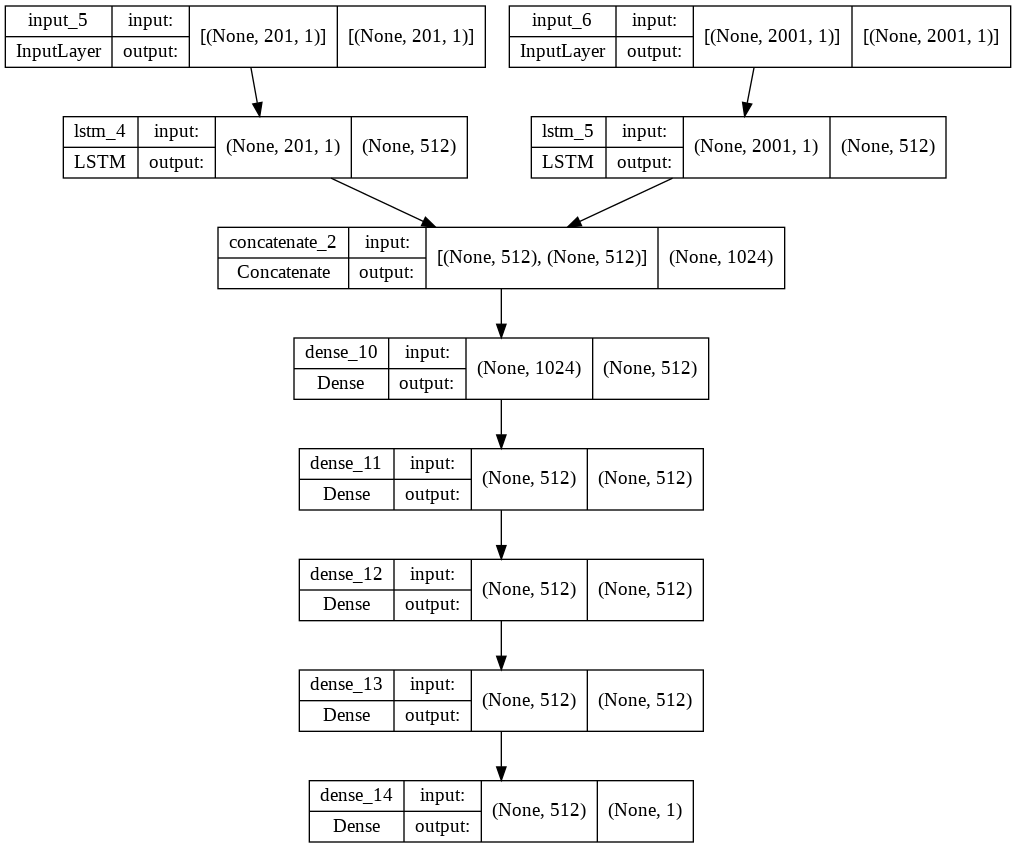

In [ ]:
local_input_lstm = tf.keras.Input(shape=(local_len,1))
global_input_lstm = tf.keras.Input(shape=(global_len,1))
x_local_lstm = tf.keras.layers.LSTM(512)(local_input_lstm)
x_global_lstm = tf.keras.layers.LSTM(512)(global_input_lstm)

x = tf.keras.layers.concatenate([x_local_lstm,x_global_lstm])
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
# x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
# x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
# x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512,activation=tf.nn.relu)(x)
y = tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)(x)

model_lstm = tf.keras.Model(inputs=(local_input_lstm,global_input_lstm), outputs=y)
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=1e-05,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    ), loss="mse", metrics=['accuracy'])
model_lstm.summary()
tf.keras.utils.plot_model(model_lstm, show_shapes=True, show_layer_names=True)

Note: we trained the LSTM model for more than 5 epochs. We just ran the code multiple times since it took long to run.

In [ ]:
epochs = 5
model_lstm.fit(x=(local_train,global_train),y=y_train,epochs=epochs)

Epoch 1/5
394/394 [==============================] - 295s 748ms/step - loss: 0.1011 - accuracy: 0.8495
Epoch 2/5
394/394 [==============================] - 295s 749ms/step - loss: 0.0981 - accuracy: 0.8575
Epoch 3/5
 47/394 [==>...........................] - ETA: 4:20 - loss: 0.0906 - accuracy: 0.8657

In [ ]:
tf.keras.models.save_model(model_lstm,'/content/drive/MyDrive/AM216/Mini Project/lstm_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AM216/Mini Project/lstm_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/AM216/Mini Project/lstm_model/assets


# Plotting

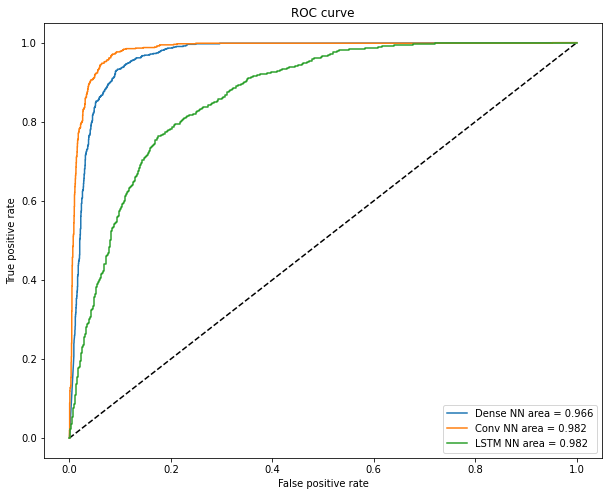

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

dense_model = tf.keras.models.load_model('/content/drive/MyDrive/AM216/Mini Project/dense_model')
conv_model = tf.keras.models.load_model('/content/drive/MyDrive/AM216/Mini Project/conv_model')
lstm_model = tf.keras.models.load_model('/content/drive/MyDrive/AM216/Mini Project/lstm_model')
X_test = (local_test,global_test)

# Dense
y_pred_dense = dense_model.predict(X_test).ravel()
fpr_dense, tpr_dense, thresholds_dense = roc_curve(y_test, y_pred_dense)
auc_dense = auc(fpr_dense, tpr_dense)

# Conv
y_pred_conv = conv_model.predict(X_test).ravel()
fpr_conv, tpr_conv, thresholds_conv = roc_curve(y_test, y_pred_conv)
auc_conv = auc(fpr_conv, tpr_conv)

# LSTM
y_pred_lstm = lstm_model.predict(X_test).ravel()
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, y_pred_lstm)
auc_lstm = auc(fpr_lstm, tpr_lstm)

plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dense, tpr_dense, label='Dense NN area = {:.3f}'.format(auc_dense))
plt.plot(fpr_conv, tpr_conv, label='Conv NN area = {:.3f}'.format(auc_conv))
plt.plot(fpr_lstm, tpr_lstm, label='LSTM NN area = {:.3f}'.format(auc_conv))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Precision versus recall')

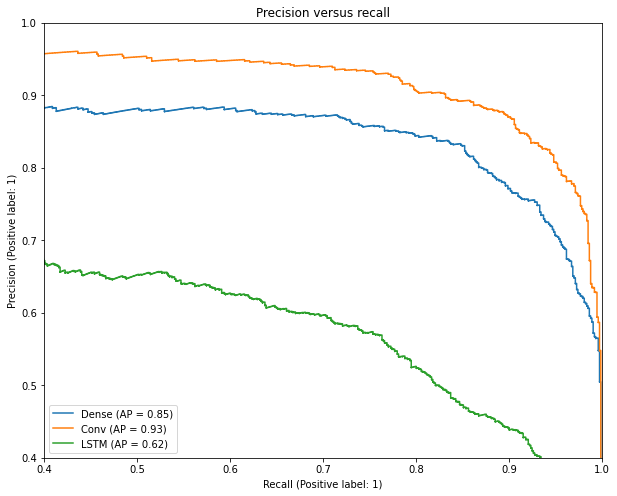

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

disp_dense = PrecisionRecallDisplay.from_predictions(y_test, y_pred_dense, name="Dense")
ax = plt.gca()
disp_conv = PrecisionRecallDisplay.from_predictions(y_test, y_pred_conv, ax=ax, name="Conv")
disp_lstm = PrecisionRecallDisplay.from_predictions(y_test, y_pred_lstm, ax=ax, name="LSTM")
ax.figure.set_size_inches(10, 8)
ax.set_xlim([0.4, 1])
ax.set_ylim([0.4, 1])
ax.set_title('Precision versus recall')